In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt


In [3]:
# Constants
mu_1 = 938  # MeV
P_1 = 2.08  # MeV/fm³ (assumed energy density)
n_0 = 0.16  # fm⁻³ (number density corresponding to 2.68e14 g/cm³)
n_1 = 1.1 * n_0  # fm⁻³



In [4]:
def generate_points(N, mu_1=938, mu_N1=2600):
    """
    Generate random mu_points and cs2_points for piecewise linear c_s^2(mu).
    
    Parameters:
    N (int): Number of segments (e.g., 3, 4, 5, 7).
    mu_1 (float): Starting mu value in MeV.
    mu_N1 (float): Ending mu value in MeV.
    
    Returns:
    mu_points (list): List of mu values in increasing order.
    cs2_points (list): List of c_s^2 values corresponding to mu_points.
    """
    # Sample maximum sound speed squared from [0,1]

    c_s_max2 = np.random.uniform(0, 1)
    
    # Sample N-1 intermediate mu points in [mu_1, mu_N1] and sort them

    if N > 1:
        intermediate_mus = np.random.uniform(mu_1, mu_N1, N-1)
        intermediate_mus.sort()
    else:
        intermediate_mus = []
    
    # Construct mu_points with fixed endpoints
    mu_points = [mu_1] + list(intermediate_mus) + [mu_N1]
    
    # Sample c_s^2 values for all N+1 points from [0, c_s_max2]
    cs2_points = np.random.uniform( 0, c_s_max2, N+1).tolist()
    cs2_points.sort()
    return mu_points, cs2_points

In [7]:
# Generate piecewise linear c_s²(μ) parameters
N = 3  # Number of segments, can be 3, 4, 5, or 7
mu_points, cs2_points = generate_points(N, mu_1=938, mu_N1=2600)


In [9]:
print(mu_points)

[938, 1765.4656083499863, 2391.7484694474306, 2600]


In [11]:
print(cs2_points)

[0.0604471336924979, 0.07299745705457097, 0.07752080433544603, 0.18440279931163484]


In [13]:
# Example output (values will vary due to randomness)
print("mu_points:", mu_points)
print("cs2_points:", cs2_points)

mu_points: [938, 1765.4656083499863, 2391.7484694474306, 2600]
cs2_points: [0.0604471336924979, 0.07299745705457097, 0.07752080433544603, 0.18440279931163484]


In [15]:
# Define c_s²(μ) with standard linear interpolation
def c_s2(mu):
    if mu <= mu_points[0]:
        return cs2_points[0]
    elif mu >= mu_points[-1]:
        return cs2_points[-1]
    for i in range(len(mu_points) - 1):
        if mu_points[i] <= mu <= mu_points[i + 1]:
            return ( cs2_points[i]*(mu_points[i + 1] - mu)  +  cs2_points[i + 1] * (mu - mu_points[i]) ) / (mu_points[i + 1] - mu_points[i])


In [17]:
# Integrand for equation (2)
def integrand_eq2(mu_prime):
    cs2 = c_s2(mu_prime)
    if cs2 == 0:  # Avoid division by zero
        return 0
    return 1 / (mu_prime * cs2)


# n(μ) from equation (2)
def n_mu(mu):
    if mu == mu_1:
        return n_1
    integral, _ = quad(integrand_eq2, mu_1, mu)
    return n_1 * np.exp(integral)



In [19]:
# Integrand for equation (3)
def integrand_eq3(mu_prime):
    return n_mu(mu_prime)

# P(μ) from equation (3)
def P_mu(mu):
    if mu == mu_1:
        return P_1
    integral, _ = quad(integrand_eq3, mu_1, mu)
    return P_1 + integral


In [21]:
# Generate μ grid and compute n and P
mu_grid = np.linspace(mu_1, 2600, 100)  # MeV, adjusted to reach n = 40 n_0
n_grid = np.array([n_mu(mu) for mu in mu_grid])
P_grid = np.array([P_mu(mu) for mu in mu_grid])
cs2_grid = np.array([c_s2(mu) for mu in mu_grid])



C:\Users\User\AppData\Local\Temp\ipykernel_8140\1762087462.py:9: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, _ = quad(integrand_eq3, mu_1, mu)


In [23]:
# Convert n to n/n_0
n_over_n0 = n_grid / n_0


In [25]:
print(mu_grid)

[ 938.          954.78787879  971.57575758  988.36363636 1005.15151515
 1021.93939394 1038.72727273 1055.51515152 1072.3030303  1089.09090909
 1105.87878788 1122.66666667 1139.45454545 1156.24242424 1173.03030303
 1189.81818182 1206.60606061 1223.39393939 1240.18181818 1256.96969697
 1273.75757576 1290.54545455 1307.33333333 1324.12121212 1340.90909091
 1357.6969697  1374.48484848 1391.27272727 1408.06060606 1424.84848485
 1441.63636364 1458.42424242 1475.21212121 1492.         1508.78787879
 1525.57575758 1542.36363636 1559.15151515 1575.93939394 1592.72727273
 1609.51515152 1626.3030303  1643.09090909 1659.87878788 1676.66666667
 1693.45454545 1710.24242424 1727.03030303 1743.81818182 1760.60606061
 1777.39393939 1794.18181818 1810.96969697 1827.75757576 1844.54545455
 1861.33333333 1878.12121212 1894.90909091 1911.6969697  1928.48484848
 1945.27272727 1962.06060606 1978.84848485 1995.63636364 2012.42424242
 2029.21212121 2046.         2062.78787879 2079.57575758 2096.36363636
 2113.

In [27]:
print(n_grid/0.16 * 2.68e14)

[2.94800000e+14 3.95104309e+14 5.26206306e+14 6.96559945e+14
 9.16668421e+14 1.19951545e+15 1.56107343e+15 2.02089957e+15
 2.60283254e+15 3.33580304e+15 4.25477360e+15 5.40182405e+15
 6.82740065e+15 8.59174883e+15 1.07665507e+16 1.34367908e+16
 1.67028749e+16 2.06830293e+16 2.55160093e+16 3.13641479e+16
 3.84167784e+16 4.68940657e+16 5.70512847e+16 6.91835850e+16
 8.36312841e+16 1.00785735e+17 1.21095812e+17 1.45075068e+17
 1.73309615e+17 2.06466770e+17 2.45304546e+17 2.90682025e+17
 3.43570678e+17 4.05066715e+17 4.76404495e+17 5.58971098e+17
 6.54322111e+17 7.64198695e+17 8.90546029e+17 1.03553318e+18
 1.20157449e+18 1.39135257e+18 1.60784295e+18 1.85434051e+18
 2.13448771e+18 2.45230482e+18 2.81222205e+18 3.21911390e+18
 3.67833562e+18 4.19576191e+18 4.77811321e+18 5.43343407e+18
 6.16994081e+18 6.99661221e+18 7.92329971e+18 8.96080019e+18
 1.01209340e+19 1.14166282e+19 1.28620055e+19 1.44724775e+19
 1.62648499e+19 1.82574250e+19 2.04701190e+19 2.29245830e+19
 2.56443314e+19 2.865488

In [29]:
print(P_grid * 1.6022e33)

[3.33257600e+33 8.83558706e+33 1.61864825e+34 2.59452132e+34
 3.88234095e+34 5.57206545e+34 7.77682875e+34 1.06382057e+35
 1.43325139e+35 1.90783229e+35 2.51453684e+35 3.28650881e+35
 4.26430312e+35 5.49734177e+35 7.04561598e+35 8.98166933e+35
 1.13929005e+36 1.43842281e+36 1.80811659e+36 2.26333590e+36
 2.82186399e+36 3.50476659e+36 4.33692075e+36 5.34761623e+36
 6.57123758e+36 8.04803573e+36 9.82499883e+36 1.19568324e+37
 1.45070602e+37 1.75492578e+37 2.11684319e+37 2.54625580e+37
 3.05442941e+37 3.65428822e+37 4.36062581e+37 5.19033854e+37
 6.16268324e+37 7.29956138e+37 8.62583168e+37 1.01696535e+38
 1.19628632e+38 1.40413864e+38 1.64456885e+38 1.92212655e+38
 2.24191797e+38 2.60966419e+38 3.03176431e+38 3.51536407e+38
 4.06843005e+38 4.69982998e+38 5.41943033e+38 6.23829724e+38
 7.16880121e+38 8.22468877e+38 9.42121764e+38 1.07753023e+39
 1.23056722e+39 1.40330426e+39 1.59802994e+39 1.81726985e+39
 2.06380814e+39 2.34071069e+39 2.65135005e+39 2.99943235e+39
 3.38902626e+39 3.824593

In [31]:
print(cs2_grid)

[0.06044713 0.06070176 0.06095638 0.06121101 0.06146563 0.06172026
 0.06197488 0.06222951 0.06248413 0.06273876 0.06299338 0.06324801
 0.06350263 0.06375726 0.06401188 0.06426651 0.06452113 0.06477576
 0.06503038 0.06528501 0.06553963 0.06579426 0.06604888 0.06630351
 0.06655813 0.06681275 0.06706738 0.067322   0.06757663 0.06783125
 0.06808588 0.0683405  0.06859513 0.06884975 0.06910438 0.069359
 0.06961363 0.06986825 0.07012288 0.0703775  0.07063213 0.07088675
 0.07114138 0.071396   0.07165063 0.07190525 0.07215988 0.0724145
 0.07266913 0.07292375 0.07308361 0.07320486 0.07332611 0.07344736
 0.07356861 0.07368986 0.07381112 0.07393237 0.07405362 0.07417487
 0.07429612 0.07441737 0.07453862 0.07465987 0.07478112 0.07490237
 0.07502363 0.07514488 0.07526613 0.07538738 0.07550863 0.07562988
 0.07575113 0.07587238 0.07599363 0.07611488 0.07623614 0.07635739
 0.07647864 0.07659989 0.07672114 0.07684239 0.07696364 0.07708489
 0.07720614 0.07732739 0.07744864 0.08100926 0.08962538 0.0982415

In [33]:
# Filter for the desired range: 1.1 n_0 to 40 n_0
mask = (n_over_n0 >= 1.1) & (n_over_n0 <= 40)
n_plot = n_over_n0[mask]
P_plot = P_grid[mask]
cs2_plot = cs2_grid[mask]


In [35]:
print(n_plot * 2.68e14)

[2.94800000e+14 3.95104309e+14 5.26206306e+14 6.96559945e+14
 9.16668421e+14 1.19951545e+15 1.56107343e+15 2.02089957e+15
 2.60283254e+15 3.33580304e+15 4.25477360e+15 5.40182405e+15
 6.82740065e+15 8.59174883e+15]


In [37]:
print(P_plot * 1.6022e33)

[3.33257600e+33 8.83558706e+33 1.61864825e+34 2.59452132e+34
 3.88234095e+34 5.57206545e+34 7.77682875e+34 1.06382057e+35
 1.43325139e+35 1.90783229e+35 2.51453684e+35 3.28650881e+35
 4.26430312e+35 5.49734177e+35]


In [39]:
print(cs2_plot)

[0.06044713 0.06070176 0.06095638 0.06121101 0.06146563 0.06172026
 0.06197488 0.06222951 0.06248413 0.06273876 0.06299338 0.06324801
 0.06350263 0.06375726]


In [41]:
sound_speed_squared = np.column_stack(( cs2_plot  ))
np.savetxt("sound_speed_squared", sound_speed_squared,  fmt="%.6e")

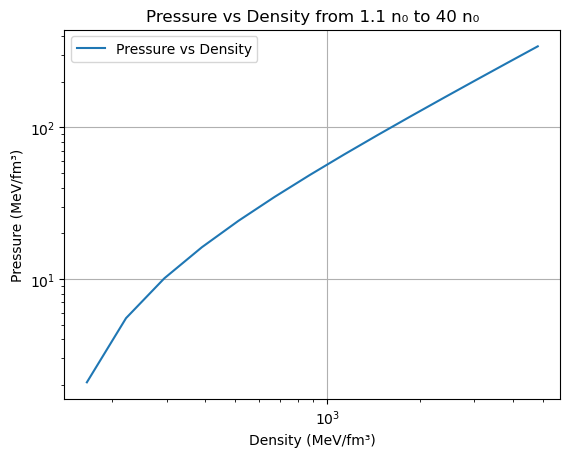

In [43]:
# Plotting
plt.plot( (n_plot*2.68e14)/ 1.7827e12, P_plot, label='Pressure vs Density')
plt.xlabel('Density (MeV/fm³)')
plt.ylabel('Pressure (MeV/fm³)')
plt.title('Pressure vs Density from 1.1 n₀ to 40 n₀')
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.legend()
plt.show()

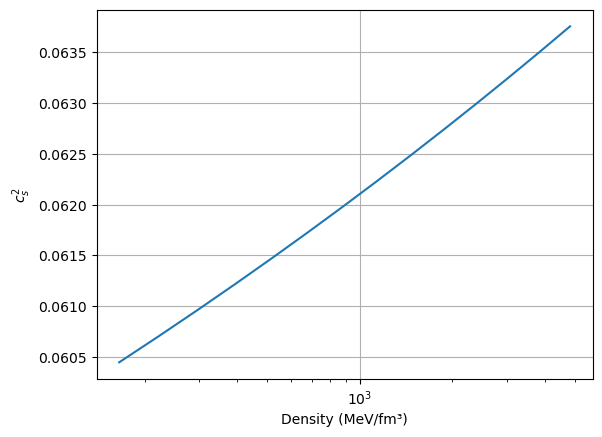

In [45]:
# Plotting
plt.plot( (n_plot*2.68e14)/ 1.7827e12 , cs2_plot)
plt.xlabel('Density (MeV/fm³)')
plt.ylabel(r'$c_{s}^2$')
#plt.title('Pressure vs Density from 1.1 n₀ to 40 n₀')
plt.xscale("log")
#plt.yscale("log")
plt.grid(True)
#plt.legend()
plt.show()

In [47]:
data_speed_of_sound = np.column_stack(( P_plot * 1.6022e33 , n_plot * 2.68e14 ))
np.savetxt("data_speed_of_sound", data_speed_of_sound,  fmt="%.6e")

In [ ]:
data_1 = np.loadtxt("data_polytropic")
data_2 = np.loadtxt("data_speed_of_sound")

In [ ]:
data_1_pres = data_1[:,0]
data_1_density = data_1[:,1]

data_2_pres = data_2[:,0]
data_2_density = data_2[:,1]



In [ ]:
eps_total = np.array([*data_1_density,*data_2_density])
pres_total = np.array([*data_1_pres,*data_2_pres])

In [ ]:
print(eps_total)

In [ ]:
print(pres_total)

In [ ]:
plt.plot(eps_total, pres_total)
plt.show()

In [ ]:
# Plotting
plt.plot( eps_total/(1.7827e12), pres_total/(1.6022e33))
plt.xlabel('Density (MeV/fm³)')
plt.ylabel('Pressure (MeV/fm³)')
plt.title('Pressure vs Density')
plt.xscale("log")
plt.yscale("log")
plt.xlim([10**2,10**4])
plt.ylim([10**0,10**4])
plt.grid(True)
#plt.legend()
plt.show()

In [ ]:
full_EOS = np.column_stack(( pres_total,eps_total  ))
np.savetxt("Full_EOS", full_EOS,  fmt="%.6e")

In [ ]:
import numpy as np

# Load the EOS data
eos_data = np.loadtxt('Full_EOS', dtype=float)

# Load the sound speed squared data
cs2_data = np.loadtxt('sound_speed_squared', dtype=float)

# Verify the data shapes
print(f"EOS data shape: {eos_data.shape}")  # Should be (614, 2)
print(f"cs2 data length: {len(cs2_data)}")  # Should be 88

# Ensure the cs2 data matches the last 88 rows
if len(cs2_data) != 88:
    raise ValueError("Expected 88 cs2 values, but got {}".format(len(cs2_data)))

# Create an output array with three columns, initialized with NaN for cs2
output_data = np.full((eos_data.shape[0], 3), np.nan)
# Copy n and P to the first two columns
output_data[:, :2] = eos_data
# Add cs2 values to the last 88 rows of the third column
output_data[-88:, 2] = cs2_data

# Save to a new file, handling NaN as empty strings for the first 526 rows
np.savetxt('Full_EOS_with_cs2.txt', output_data, fmt=['%.6e', '%.6e', '%s'],
           delimiter=' ', encoding='utf-8',
           comments='', header='n P cs2')
# Note: Using '%s' for the third column to write empty strings for NaN values

In [49]:
import numpy as np

# Load the EOS data
eos_data = np.loadtxt('EOS_FULL_GROK', dtype=float)

# Load the sound speed squared data
cs2_data = np.loadtxt('sound_speed_squared', dtype=float)

# Verify the data shapes
print(f"EOS data shape: {eos_data.shape}")  # Should be (614, 2)
print(f"cs2 data length: {len(cs2_data)}")  # Should be 88

# Ensure the cs2 data matches the last 88 rows
if len(cs2_data) != 88:
    raise ValueError("Expected 88 cs2 values, but got {}".format(len(cs2_data)))

# Create an output array with three columns, initialized with NaN for cs2
output_data = np.full((eos_data.shape[0], 3), np.nan)
# Copy n and P to the first two columns
output_data[:, :2] = eos_data
# Add cs2 values to the last 88 rows of the third column
output_data[-88:, 2] = cs2_data

# Save to a new file, handling NaN as empty strings for the first 526 rows
np.savetxt('EOS_FULL_GROK_with_cs2.txt', output_data, fmt=['%.6e', '%.6e', '%s'],
           delimiter=' ', encoding='utf-8',
           comments='', header='n P cs2')
# Note: Using '%s' for the third column to write empty strings for NaN values

EOS data shape: (1171, 2)
cs2 data length: 88
